In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df=pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9227 entries, 0 to 9226
Data columns (total 9 columns):
lat          9227 non-null float64
lng          9227 non-null float64
desc         9227 non-null object
zip          8012 non-null float64
title        9227 non-null object
timeStamp    9227 non-null object
twp          9219 non-null object
addr         9168 non-null object
e            9226 non-null float64
dtypes: float64(4), object(5)
memory usage: 648.9+ KB


In [6]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0


In [7]:
df['zip'].value_counts().head(5)

19401.0    656
19464.0    583
19403.0    461
19446.0    436
19406.0    331
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    676
ABINGTON        581
NORRISTOWN      532
UPPER MERION    521
CHELTENHAM      403
Name: twp, dtype: int64

In [37]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [38]:
df['Reason'].value_counts()

EMS        4608
Traffic    3354
Fire       1265
Name: Reason, dtype: int64

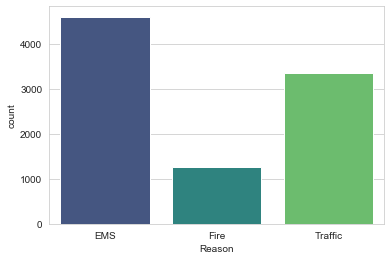

In [39]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [40]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [41]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [42]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [43]:
df['Day of Week'] = df['Day of Week'].map(dmap)

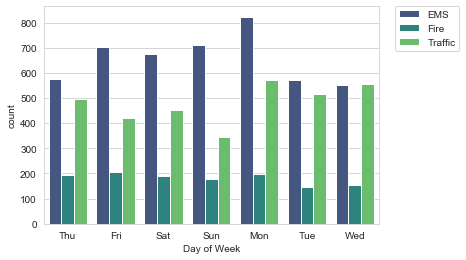

In [44]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)